# Allocate Benchmarks

In [1]:
# select measurement file
file_name = "../output/2024-05-24 20-48-27 full.json"

# select style options
grey_fill_between = False

if grey_fill_between:
    fill_between_args = {"color": "grey"}
else:
    fill_between_args = {}

In [2]:
# parse data
import json

with open(file_name) as file:
    raw_data = json.load(file)

In [3]:
from util.convert import convert_data
from IPython.core.display import HTML

# filter and convert data
deallocate_min = convert_data(raw_data, "deallocate_min", ["mean", "min", "max", "options.object_size", "machine_name", "cold_start", "repetitions"])
deallocate_max = convert_data(raw_data, "deallocate_max", ["mean", "min", "max", "options.object_size", "machine_name", "cold_start", "repetitions"])

display(HTML("<b>MIN Data:</b>"))
display(deallocate_min.head())
display(HTML("<b>MAX Data:</b>"))
display(deallocate_max.head())

,mean,min,max,options.object_size,machine_name,cold_start,repetitions
0,1096.168,1096,1180,0,esp32c3,0,500
1,1189.324,1180,1194,32,esp32c3,0,500
2,1177.994,1174,1179,64,esp32c3,0,500
3,1216.992,1213,1217,96,esp32c3,0,500
4,1177.998,1177,1178,128,esp32c3,0,500


,mean,min,max,options.object_size,machine_name,cold_start,repetitions
0,48086.076,48084,49122,0,esp32c3,0,500
1,50221.760,50220,51100,32,esp32c3,0,500
2,51084.008,51084,51088,64,esp32c3,0,500
3,52422.648,52422,52746,96,esp32c3,0,500
4,54085.720,54084,54944,128,esp32c3,0,500


In [4]:

from util.convert import get_storage_measurement
from IPython.core.display import HTML

(storage_read, storage_write) = get_storage_measurement(raw_data, deallocate_max["options.object_size"].max())

display(HTML("<b>READ Data:</b>"))
display(storage_read.head())
display(HTML("<b>WRITE Data:</b>"))
display(storage_write.head())

,mean,min,max,options.object_size,machine_name,cold_start,repetitions
0,282.638,163,726,0,esp32c3,0,500
1,1664.226,1468,1961,32,esp32c3,0,500
2,2997.312,2974,3674,64,esp32c3,0,500
3,4495.534,4061,4966,96,esp32c3,0,500
4,5994.978,5978,6002,128,esp32c3,0,500


,mean,min,max,options.object_size,machine_name,cold_start,repetitions
0,397.272,243,696,0,esp32c3,0,500
1,1995.778,1904,1996,32,esp32c3,0,500
2,2995.966,2979,2996,64,esp32c3,0,500
3,4993.570,4296,4995,96,esp32c3,0,500
4,5994.940,5979,5995,128,esp32c3,0,500


Text(0.5, 1.0, 'Deallocate Latency for "esp32c3"')

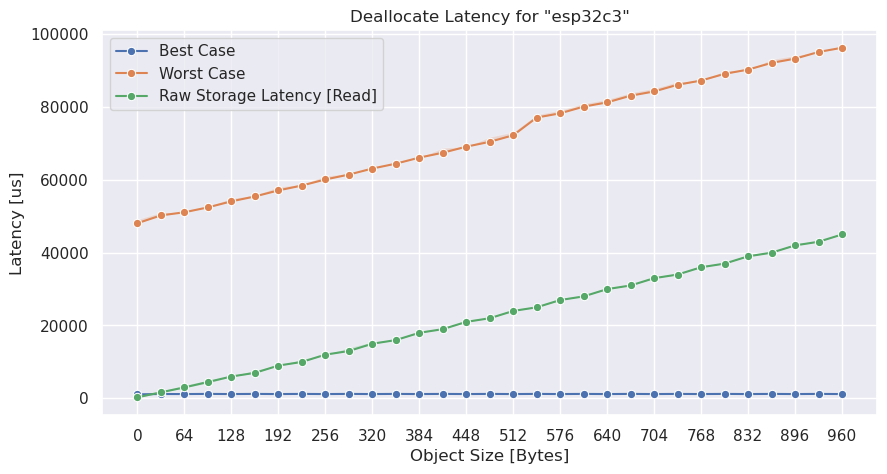

In [5]:
from util.plot import set_gird
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)

if len(deallocate_min) != 0:
    sns.lineplot(ax=ax, data=deallocate_min, x="options.object_size", y="mean", label="Best Case", markers=["o"], marker="o")
    ax.fill_between(deallocate_min["options.object_size"], deallocate_min["min"], deallocate_min["max"], alpha=0.2, **fill_between_args)

if len(deallocate_max) != 0:
    sns.lineplot(ax=ax, data=deallocate_max, x="options.object_size", y="mean", label="Worst Case", markers=["o"], marker="o")
    ax.fill_between(deallocate_max["options.object_size"], deallocate_max["min"], deallocate_max["max"], alpha=0.2, **fill_between_args)

if len(storage_read) != 0:
    sns.lineplot(ax=ax, data=storage_read, x="options.object_size", y="mean", label="Raw Storage Latency [Read]", markers=["o"], marker="o")
    ax.fill_between(storage_read["options.object_size"], storage_read["min"], storage_read["max"], alpha=0.2, **fill_between_args)

set_gird(64, max(deallocate_min["options.object_size"].max(), deallocate_max["options.object_size"].max()), ax)

ax.set_xlabel("Object Size [Bytes]")
ax.set_ylabel("Latency [us]")
ax.set_title("Deallocate Latency for \"" + deallocate_min["machine_name"][0] + "\"")